<a href="https://colab.research.google.com/github/JhonAlexG/cd_202202_Jhon_Gonzalez/blob/main/Taller_de_colores_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install cython
!pip install cartopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.8 MB 5.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 52.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 26.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 41.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 12.1 MB 76.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████

In [2]:
!apt-get -qq install python-cartopy python3-cartopy
!pip uninstall -y shapely    # cartopy and shapely aren't friends (early 2020)
!pip install shapely --no-binary shapely

Selecting previously unselected package python-pkg-resources.
(Reading database ... 155676 files and directories currently installed.)
Preparing to unpack .../00-python-pkg-resources_39.0.1-2_all.deb ...
Unpacking python-pkg-resources (39.0.1-2) ...
Selecting previously unselected package python-pyshp.
Preparing to unpack .../01-python-pyshp_1.2.12+ds-1_all.deb ...
Unpacking python-pyshp (1.2.12+ds-1) ...
Selecting previously unselected package python-shapely.
Preparing to unpack .../02-python-shapely_1.6.4-1_amd64.deb ...
Unpacking python-shapely (1.6.4-1) ...
Selecting previously unselected package python-six.
Preparing to unpack .../03-python-six_1.11.0-2_all.deb ...
Unpacking python-six (1.11.0-2) ...
Selecting previously unselected package python-cartopy:amd64.
Preparing to unpack .../04-python-cartopy_0.14.2+dfsg1-2build3_amd64.deb ...
Unpacking python-cartopy:amd64 (0.14.2+dfsg1-2build3) ...
Selecting previously unselected package python3-numpy.
Preparing to unpack .../05-python

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm

import numpy as np

import cartopy
import cartopy.crs as ccrs                   # for projections
import cartopy.feature as cfeature           # for features
import cartopy.io.shapereader as shapereader
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.feature.nightshade import Nightshade

In [5]:
# Obtain the remote shapefile files
import urllib.request

url = 'https://foscalinternacional.com/cartografia/'

file_list = ["68276_manzanas.cpg", "68276_manzanas.dbf", "68276_manzanas.prj", "68276_manzanas.qpj", "68276_manzanas.shp", "68276_manzanas.shx"]

for file in file_list:
    urllib.request.urlretrieve(url+file, file)

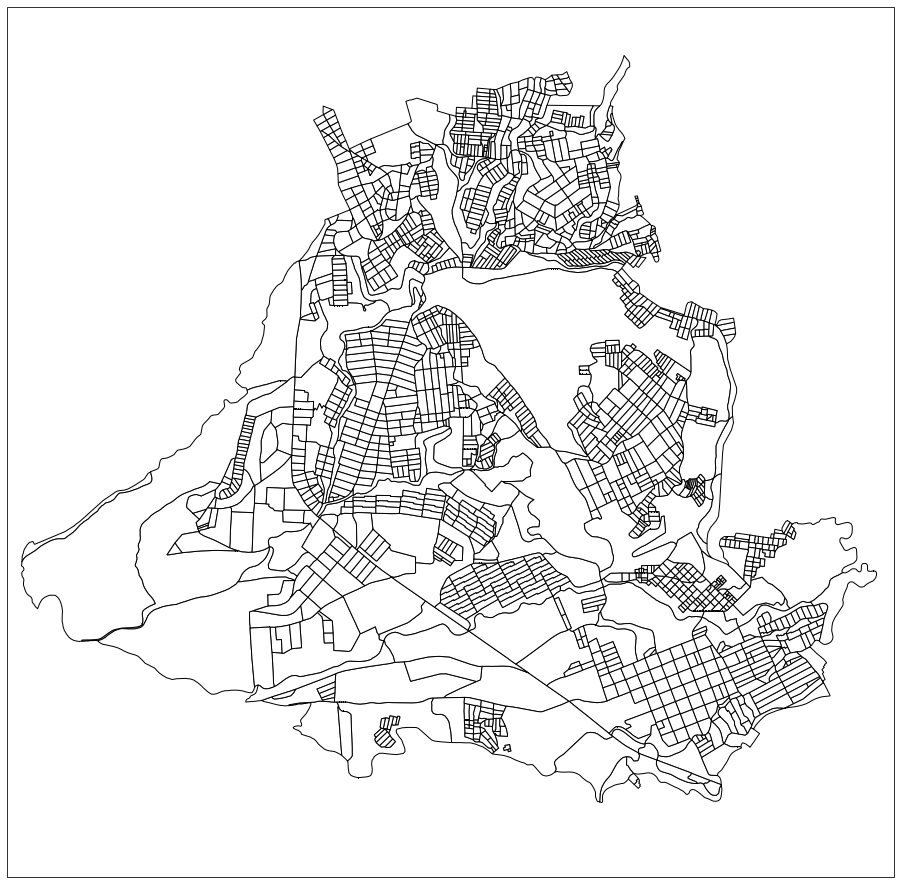

In [6]:
subplot_kw = dict(projection=ccrs.PlateCarree())

fig, ax = plt.subplots(figsize=(16, 16), subplot_kw=subplot_kw)

# Mapa de floridablanca
lower_lon = -73.125
upper_lon = -73.073
lower_lat = 7.051
upper_lat = 7.102

ax.set_extent([lower_lon, upper_lon, lower_lat, upper_lat])

reader = shapereader.Reader('68276_manzanas')

for manzana in reader.geometries():
    ax.add_geometries([manzana], ccrs.PlateCarree(), facecolor='white', edgecolor='black')

ax.add_line
plt.show()

In [7]:
import colorsys
import math 

In [8]:
def generar_gama(ri,gi,bi,rf,gf,bf,cantidad):
  hsvi = colorsys.rgb_to_hsv(ri/255,gi/255,bi/255)
  hsvf = colorsys.rgb_to_hsv(rf/255,gf/255,bf/255)

  pasoh = (hsvf[0]- hsvi[0])/(cantidad - 1)
  pasos= (hsvf[1]- hsvi[1])/(cantidad - 1)
  pasov = (hsvf[2]- hsvi[2])/(cantidad - 1)

  listaRGB = []

  listaRGB.append((ri/255,gi/255,bi/255))

  for i in range(cantidad - 1):
    h = hsvi[0] + pasoh * (i + 1)
    s = hsvi[1] + pasos * (i + 1)
    v = hsvi[2] + pasov * (i + 1)

    rgb = colorsys.hsv_to_rgb(h,s,v)
    #listaRGB.append([round( rgb[0] * 255 , 0),round( rgb[1] * 255 , 0), round(rgb[2] * 255 , 0)] )
    listaRGB.append(rgb)

  
  return listaRGB


In [9]:
gama = generar_gama(255,0,0,255,255,0,10)
gama

[(1.0, 0.0, 0.0),
 (1.0, 0.11111111111111116, 0.0),
 (1.0, 0.2222222222222222, 0.0),
 (1.0, 0.33333333333333326, 0.0),
 (1.0, 0.4444444444444444, 0.0),
 (1.0, 0.5555555555555556, 0.0),
 (1.0, 0.6666666666666666, 0.0),
 (1.0, 0.7777777777777777, 0.0),
 (1.0, 0.8888888888888888, 0.0),
 (1.0, 1.0, 0.0)]

In [10]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.colors as color

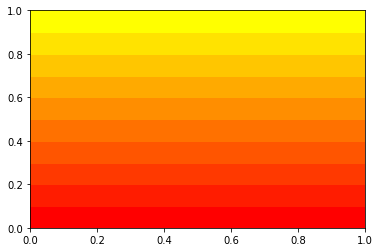

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)

count = len(gama)

x=0
y=0
h=1/count


for cl in gama:
  pos = (x / count, y/count)
  ax.add_patch(patches.Rectangle(pos,1,h,color=cl))
  if y >= count-1:
    x+=1
    y=0
  else:
    y +=1


plt.show()